In [18]:
import numpy as np
import pandas as pd
import BasicModel as bm
import statsmodels.tsa as ts
import statsmodels.tsa.stattools as tst
import arch
import warnings
warnings.filterwarnings("ignore")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [2]:
#获取三个市场的基本数据并做描述性统计
fc = bm.basicmodel()
fc.ret()
fc.ret_data.describe()

,CNY,CNH,NDF
count,2787.000000,2787.000000,2787.000000
mean,0.000038,0.000039,0.000036
std,0.002205,0.002820,0.002926
min,-0.020666,-0.017453,-0.024602
25%,-0.000829,-0.001097,-0.000991
50%,0.000029,0.000029,0.000000
75%,0.000806,0.001159,0.000992
max,0.018574,0.029092,0.043014


In [15]:
#Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
display(lb_test(fc.ret_data['CNY']))
display(lb_test(fc.ret_data['CNH']))
display(lb_test(fc.ret_data['NDF']))

,lb_stat,lb_pvalue
1,30.268084,3.762667e-08
2,31.490428,1.451912e-07
3,36.671418,5.400069e-08
4,36.810223,1.970960e-07
5,37.867240,4.012174e-07
6,42.526492,1.447145e-07
7,42.700565,3.810414e-07
8,42.782791,9.651504e-07
9,44.083577,1.362251e-06
10,46.617249,1.108310e-06


,lb_stat,lb_pvalue
1,3.757455,0.052573
2,11.466206,0.003237
3,11.466241,0.009454
4,14.070513,0.007073
5,14.072278,0.015157
6,16.632916,0.010731
7,19.172199,0.007665
8,19.385241,0.012930
9,19.524082,0.021088
10,21.087643,0.020491


,lb_stat,lb_pvalue
1,0.517276,0.472006
2,5.678912,0.058457
3,9.963924,0.018875
4,10.163899,0.037755
5,11.472272,0.042780
6,11.733063,0.068196
7,11.839584,0.105959
8,13.644810,0.091506
9,19.040508,0.024851
10,19.047673,0.039661


In [16]:
#ADF test
display(tst.adfuller(fc.ret_data['CNY']))
display(tst.adfuller(fc.ret_data['CNH']))
display(tst.adfuller(fc.ret_data['NDF']))

(-8.553681701653815,
 9.07936129375954e-14,
 28,
 2758,
 {'1%': -3.432723240296268,
  '5%': -2.862588528076247,
  '10%': -2.567328164790305},
 -25927.284652721988)

(-38.53275250755514,
 0.0,
 1,
 2785,
 {'1%': -3.4327002109623845,
  '5%': -2.8625783574325165,
  '10%': -2.5673227499524574},
 -24538.67712528536)

(-30.201908237962368,
 0.0,
 2,
 2784,
 {'1%': -3.432701055927649,
  '5%': -2.862578730603214,
  '10%': -2.567322948627832},
 -24332.600207737854)

(-0.1, 0.1)

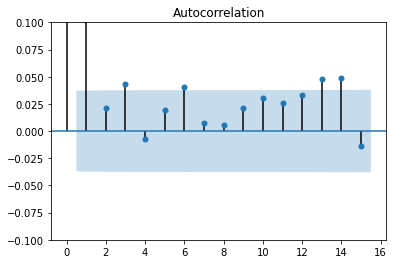

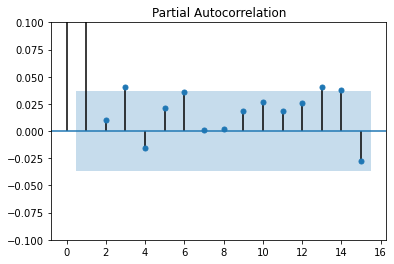

In [20]:
plot_acf(fc.ret_data['CNY'],lags=15)
plt.ylim([-0.1,0.1])
plot_pacf(fc.ret_data['CNY'],lags=15)
plt.ylim([-0.1,0.1])

In [8]:
#选择ARMA的滞后阶数（函数运行时间较长）
modelchoose = tst.arma_order_select_ic(fc.ret_data['CNY'],max_ar=10,max_ma=10,ic=['aic','bic'])
modelchoose

c:\Users\86177\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\86177\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\86177\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\86177\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\86177\anaconda3\lib\site-packages\statsmodels\base\model

In [136]:
fc.ret(start='2011-08-01',end='2015-08-01')

In [126]:
fc.ret(start='2015-09-01',end='2017-05-01')

In [115]:
fc.ret(start='2017-06-01',end='2023-11-01')

In [149]:
#AR模型
from statsmodels.tsa.ar_model import AutoReg
AR_1_res = AutoReg(fc.ret_data['NDF'],lags = 10).fit()
AR_1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    NDF   No. Observations:                  934
Model:                    AutoReg(10)   Log Likelihood                4960.116
Method:               Conditional MLE   S.D. of innovations              0.001
Date:                Fri, 01 Dec 2023   AIC                          -9896.232
Time:                        23:50:41   BIC                          -9838.288
Sample:                            10   HQIC                         -9874.125
                                  934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.265e-05   3.75e-05     -1.137      0.256      -0.000    3.09e-05
NDF.L1        -0.0436      0.033     -1.333      0.183      -0.108       0.021
NDF.L2        -0.1555      0.032     -4.799      0.000      -0.219      -0.092
NDF.L3        -0.0416      0.032     -1.286      0.198      -0.105       0.022
NDF.L4         0.0628      0.032      1.957      0.050    -8.3e-05       0.126
NDF.L5        -0.0022      0.032     -0.068      0.946      -0.065       0.061
NDF.L6        -0.0346      0.032     -1.083      0.279      -0.097       0.028
NDF.L7         0.0743      0.032      2.327      0.020       0.012       0.137
NDF.L8        -0.0213      0.032     -0.666      0.505      -0.084       0.041
NDF.L9         0.0009      0.032      0.030      0.976      -0.061       0.063
NDF.L10       -0.0172      0.032     -0.546      0.585      -0.079       0.045
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.2340           -0.5117j            1.3359           -0.4374
AR.2            -1.2340           +0.5117j            1.3359            0.4374
AR.3             1.5100           -0.4378j            1.5722           -0.0449
AR.4             1.5100           +0.4378j            1.5722            0.0449
AR.5             0.7838           -1.1897j            1.4247           -0.1573
AR.6             0.7838           +1.1897j            1.4247            0.1573
AR.7            -0.1452           -1.3352j            1.3430           -0.2672
AR.8            -0.1452           +1.3352j            1.3430            0.2672
AR.9            -0.8871           -1.6753j            1.8957           -0.3275
AR.10           -0.8871           +1.6753j            1.8957            0.3275
------------------------------------------------------------------------------
"""

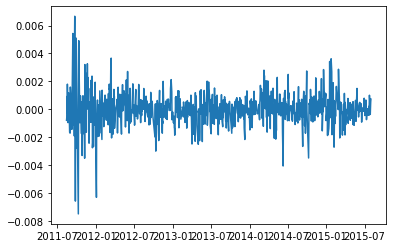

In [150]:
#AR模型的残差作图（体限异方差性）
plt.plot(AR_1_res.resid)

In [155]:
#AR_GARCH model
am = arch.arch_model(fc.ret_data['CNH'],mean='AR',lags=[1,2,7],vol='GARCH',p=1,o=0,q=1)
res = am.fit()
res.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: -4907.1269488479475
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -4907.12694497307
            Iterations: 1
            Function evaluations: 8
            Gradient evaluations: 1


c:\Users\86177\anaconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                    CNH   R-squared:                       0.092
Mean Model:                        AR   Adj. R-squared:                  0.089
Vol Model:                      GARCH   Log-Likelihood:                4907.13
Distribution:                  Normal   AIC:                          -9800.25
Method:            Maximum Likelihood   BIC:                          -9766.43
                                        No. Observations:                  927
Date:                Fri, Dec 01 2023   Df Residuals:                      923
Time:                        23:51:08   Df Model:                            4
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const      -4.0057e-05  3.708e-05     -1.080      0.280 [-1.127e-04,3.263e-05]
CNH[1]         -0.1442  2.869e-02     -5.028  4.948e-07   [ -0.200,-8.802e-02]
CNH[2]         -0.1642  3.984e-02     -4.121  3.772e-05   [ -0.242,-8.610e-02]
CNH[7]          0.2016  4.356e-02      4.629  3.677e-06      [  0.116,  0.287]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      5.0839e-08  3.783e-12  1.344e+04      0.000 [5.083e-08,5.085e-08]
alpha[1]       0.2000  6.838e-02      2.925  3.448e-03   [6.597e-02,  0.334]
beta[1]        0.7800  5.261e-02     14.826  9.899e-50     [  0.677,  0.883]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""

In [156]:
#标准化残差做Ljung-Box test
lb_test(res.std_resid.dropna(),lags=15)

,lb_stat,lb_pvalue
1,26.048616,3.329274e-07
2,28.878202,5.360166e-07
3,29.075310,2.159295e-06
4,29.299604,6.794863e-06
5,29.864141,1.568503e-05
6,30.698324,2.894185e-05
7,38.608687,2.320751e-06
8,38.872067,5.191419e-06
9,38.940649,1.180793e-05
10,39.422052,2.141137e-05


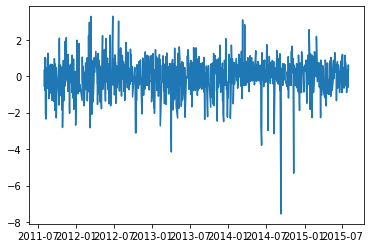

In [131]:
plt.plot(res.std_resid)